<a href="https://colab.research.google.com/github/Feeduardo/FSI/blob/master/Apresenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df['Age'].isnull().sum()
#isnull verifica a existência de valores nulos, e o sum realiza a somatória desses valores

177

In [57]:
df['Cabin'].isnull().sum()

687

In [58]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
#fillna preenche valores nulos com valores determinados pelo usuário

df['Sex'] = df['Sex'] == 'male'
df['Sex']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [59]:
df['Sex'] = df.Sex.map(lambda i: int(i))
df['Sex'].unique()

array([1, 0])

In [60]:
df['Cabin'] = df.Cabin.fillna('N')
df['Cabin'] = df.Cabin.map(lambda x: x[0])
df.Cabin.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

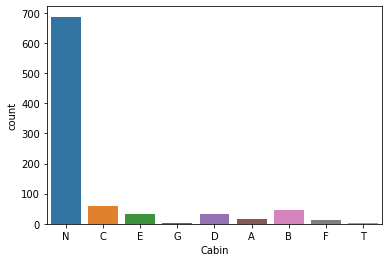

In [61]:
df_cabin_plot= sns.countplot(x='Cabin' ,data= df)
df_cabin_plot.figure.savefig('plot')

In [62]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Cabin']= label_encoder.fit_transform(df.Cabin)
#codifica a label (string) e transforma em um número

df['Cabin'].unique()

array([7, 2, 4, 6, 3, 0, 1, 5, 8])

In [63]:
df['Embarked'] = df.Embarked.fillna('N')
df['Embarked'] = label_encoder.fit_transform(df.Embarked)
df['Embarked'].unique()

array([3, 0, 2, 1])

In [64]:
X=df.drop(columns=['Survived','Name','Ticket','PassengerId'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [65]:
y = df.loc[:,'Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()
model_bayes.fit(Xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
y_bayes = model_bayes.predict(Xtest)
y_bayes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_bayes)

0.7892376681614349

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_bayes, X, y, cv=5 )

array([0.69273743, 0.74157303, 0.79213483, 0.79775281, 0.79213483])

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_rnd_forest = RandomForestClassifier()
model_rnd_forest.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_rnd_forest = model_rnd_forest.predict(Xtest)
accuracy_score(ytest, y_rnd_forest)

0.7892376681614349

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,20,30],
    'bootstrap': [True,False],
    'criterion':['gini','entropy'],
    'warm_start': [True,False],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1,2,3]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid.fit(Xtest, ytest)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [51]:
model_rnd_forest_grid = grid.best_estimator_
model_rnd_forest_grid.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_grid = model_rnd_forest_grid.predict(Xtest)
accuracy_score(ytest, y_grid)

0.8116591928251121